In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Alex\AppData\Local\Temp\ipykernel_11312\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
# импортируем данные
passengers = pd.read_csv('passengers.csv')
births = pd.read_csv('births.csv')

In [8]:
#Добавим пропуски в данные о пассажирских перевозках.

In [9]:
import random

In [10]:
#переменуем стоблец Passengers в reference
passengers.rename(columns={'#Passengers':'reference'},inplace = True)

In [11]:
passengers.head()

,Month,reference
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      144 non-null    object
 1   reference  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
passengers.isna().sum()

Month        0
reference    0
dtype: int64

In [14]:
# сделаем две копии этого столбца с названиями target и missing
passengers['target'] = passengers.reference
passengers['missing'] = passengers.reference

In [15]:
passengers.head()

,Month,reference,target,missing
0,1949-01,112,112,112
1,1949-02,118,118,118
2,1949-03,132,132,132
3,1949-04,129,129,129
4,1949-05,121,121,121


In [16]:
# посчитаем количество наблюдений
n_samples = len(passengers)
# вычислим 20 процентов от этого числа,
# это будет количество пропусков
how_many = int(0.20 * n_samples)

In [17]:
how_many

28

In [18]:
# случайным образом выберем 20 процентов значений индекса
mask_target = random.sample(list(passengers.index), how_many)
# и заполним их значением NaN в столбце target
passengers.iloc[mask_target, 2] = np.nan

In [21]:
passengers.isna().sum()

Month          0
reference      0
target        28
missing      116
dtype: int64

In [20]:
# найдем оставшиеся значения индекса
mask_missing = list(set(passengers.index) - set(mask_target))
# сделаем их NaN и поместим в столбец missing
passengers.iloc[mask_missing, 3] = np.nan

In [22]:
# переведем столбец Month в формат datetime
passengers.index = pd.to_datetime(passengers.Month)
passengers.drop(columns = ['Month'], inplace = True)

In [23]:
passengers

,reference,target,missing
Month,,,
1949-01-01,112,112.0,NaN
1949-02-01,118,118.0,NaN
1949-03-01,132,132.0,NaN
1949-04-01,129,129.0,NaN
1949-05-01,121,121.0,NaN
...,...,...,...
1960-08-01,606,606.0,NaN
1960-09-01,508,508.0,NaN
1960-10-01,461,461.0,NaN


In [24]:
passengers.isna().sum()

reference      0
target        28
missing      116
dtype: int64

In [26]:
passengers.head(3)

,reference,target,missing
Month,,,
1949-01-01,112,112.0,NaN
1949-02-01,118,118.0,NaN
1949-03-01,132,132.0,NaN


In [27]:
random.seed(1)
 
births.rename(columns = {'Births' : 'reference'}, inplace = True)
births['target'] = births.reference
births['missing'] = births.reference
 
n_samples = len(births)
how_many = int(0.15 * n_samples)
 
mask_target = random.sample(list(births.index), how_many)
births.iloc[mask_target, 2] = np.nan
 
mask_missing = list(set(births.index) - set(mask_target))
births.iloc[mask_missing, 3] = np.nan
 
births.index = pd.to_datetime(births.Date)
births.drop(columns = ['Date'], inplace = True)

In [28]:
births.isna().sum()

reference      0
target        54
missing      311
dtype: int64

In [29]:
births.head()

,reference,target,missing
Date,,,
1959-01-01,35,35.0,NaN
1959-01-02,32,NaN,32.0
1959-01-03,30,30.0,NaN
1959-01-04,31,31.0,NaN
1959-01-05,44,NaN,44.0


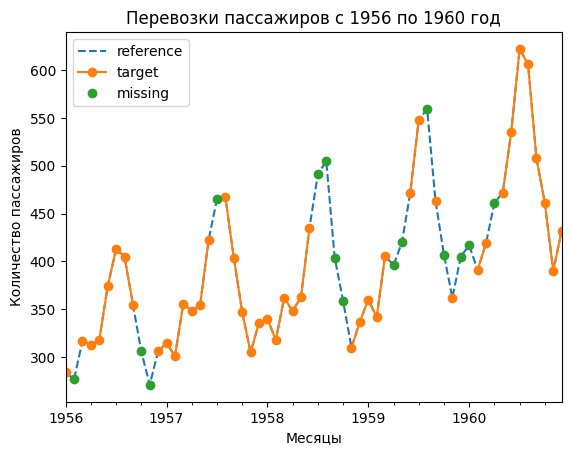

In [30]:
passengers = passengers['1956-01':'1960-12']
 
ax = passengers.plot(style=['--', 'o-', 'o'])
ax.set(title = 'Перевозки пассажиров с 1956 по 1960 год',
       xlabel = 'Месяцы',
       ylabel = 'Количество пассажиров');

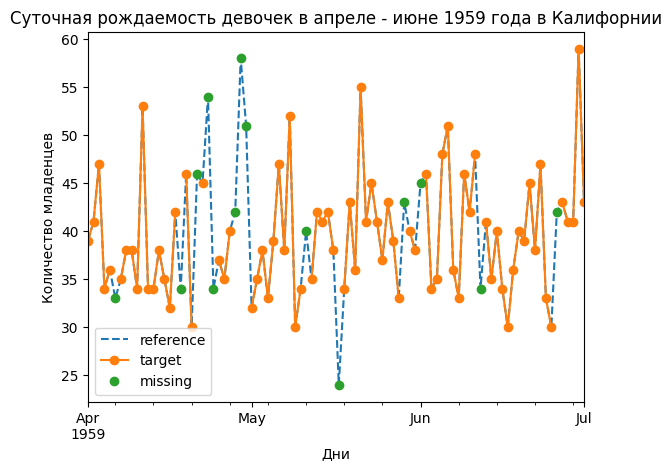

In [31]:

births = births['1959-04-01':'1959-07-01']
 
ax = births.plot(style=['--', 'o-', 'o'])
ax.set(title = 'Суточная рождаемость девочек в апреле - июне 1959 года в Калифорнии',
       xlabel = 'Дни',
       ylabel = 'Количество младенцев');

In [32]:
# передадим в метод .fillna() среднее арифметическое и медиану
passengers = passengers.assign(FillMean = passengers.target.fillna(passengers.target.mean()))
passengers = passengers.assign(FillMedian = passengers.target.fillna(passengers.target.median()))


In [33]:
# сделаем то же самое для данных о рождаемости
births = births.assign(FillMean = births.target.fillna(births.target.mean()))
births = births.assign(FillMedian = births.target.fillna(births.target.median()))

In [34]:
#Заполнение предыдущим и последующим значениями

In [35]:
#Подход last observation carried forward (LOCF) предполагает, что мы берем предыдущее от пропущенного значение и заполняем им пропуск.
#Подход next observation carried backward (NOCB), наоборот, заполняет пропуск последующим значением.

In [36]:
# заполним пропуски предыдущим значением
passengers = passengers.assign(FFill = passengers.target.ffill())
births = births.assign(FFill = births.target.ffill())

In [37]:
# заполним пропуски последующим значением
passengers = passengers.assign(BFill = passengers.target.bfill())
births = births.assign(BFill = births.target.bfill())

In [38]:
#Заполнение скользящим средним и медианой

In [39]:
# рассчитаем скользящее среднее и медиану для данных о пассажирах
passengers = passengers.assign(RollingMean =
                               passengers.target.fillna( 
                                   passengers.target.rolling(window = 5,
                                                             min_periods = 1).mean()))
 
passengers = passengers.assign(RollingMedian =
                               passengers.target.fillna(
                                   passengers.target.rolling(window = 5,
                                                             min_periods = 1).median()))


In [40]:
# рассчитаем скользящее среднее и медиану для данных о рождаемости
births = births.assign(RollingMean = 
                       births.target.fillna(
                           births.target.rolling(window = 5,
                                                 min_periods = 1).mean()))
 
births = births.assign(RollingMedian =
                       births.target.fillna(
                           births.target.rolling(window = 5,
                                                 min_periods = 1).median()))

In [41]:
methods = ['linear', 'polynomial', 'quadratic', 'cubic', 'spline']

In [42]:
# применим каждый из методов к данным о пассажирах
for m in methods:
  if m == 'polynomial':
    # для полиномиальной интерполяции нужно указать степень полинома
    # (пока поддерживаются только нечетные степени)
    passengers[m] = passengers.target.interpolate(method = m, order = 3)
  elif m == 'spline':
    # для сплайна порядок должен быть 1 <= k <= 5
    passengers[m] = passengers.target.interpolate(method = m, order = 5)
  else:
    passengers[m] = passengers.target.interpolate(method = m)

In [43]:
# сделаем то же самое с данными о рождаемости
for m in methods:
  if m == 'polynomial':
    births[m] = births.target.interpolate(method = m, order = 3)
  elif m == 'spline':
    births[m] = births.target.interpolate(method = m, order = 5)
  else:
    births[m] = births.target.interpolate(method = m)

In [44]:
# импортируем функцию для расчета RMSE
from sklearn.metrics import mean_squared_error

In [45]:
def compare_methods(df):
  # в цикле list comprehension будем брать по одному столбцу 
  # (итерируя по названиям столбцов)
  # и рассчитывать корень (squared = False) среднеквадратической ошибки
  results = [(method, mean_squared_error(df.reference, df[method], squared = False).round(2)) for method in df.columns[3:]]
  # преобразуем получившийся список вначале в массив Numpy, затем в датафрейм
  results = pd.DataFrame(np.array(results), columns = ['Method', 'RMSE'])
  # отсортируем по размеру ошибки в возрастающем (по умолчанию) порядке
  results.sort_values(by = 'RMSE', inplace = True)
  # сброим индекс
  results.reset_index(drop = True, inplace = True)
  return results

In [46]:
# сравним методы для данных о пассажирах
passengers_results = compare_methods(passengers)
passengers_results

a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared err

,Method,RMSE
0,spline,17.78
1,polynomial,17.8
2,cubic,17.8
3,quadratic,18.28
4,linear,24.35
5,FFill,24.6
6,RollingMean,36.72
7,RollingMedian,39.77
8,FillMean,40.58
9,BFill,41.95


In [47]:
# и рождаемости
births_results = compare_methods(births)
births_results

a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
a:\anaconda3\envs\clust_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared err

,Method,RMSE
0,FillMean,3.55
1,FillMedian,3.65
2,RollingMedian,3.81
3,RollingMean,3.89
4,linear,4.04
5,polynomial,4.22
6,quadratic,4.22
7,cubic,4.22
8,FFill,4.3
9,BFill,4.39


Text(0.5, 1.0, 'Заполнение пропусков в данных о пассажирах методом spline 5-го порядка')

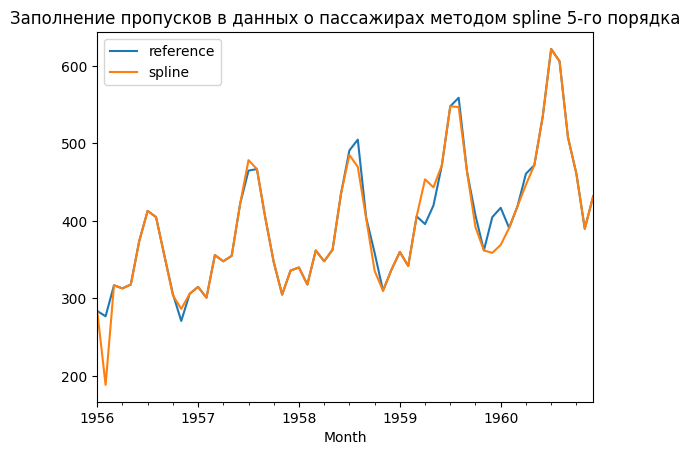

In [48]:
# выведем лидера по точности заполнения пропусков в данных о пассажирах
passengers[['reference', 'spline']].plot()
plt.title('Заполнение пропусков в данных о пассажирах методом spline 5-го порядка')

Text(0.5, 1.0, 'Заполнение пропусков в данных о рождаемости средним арифметическим')

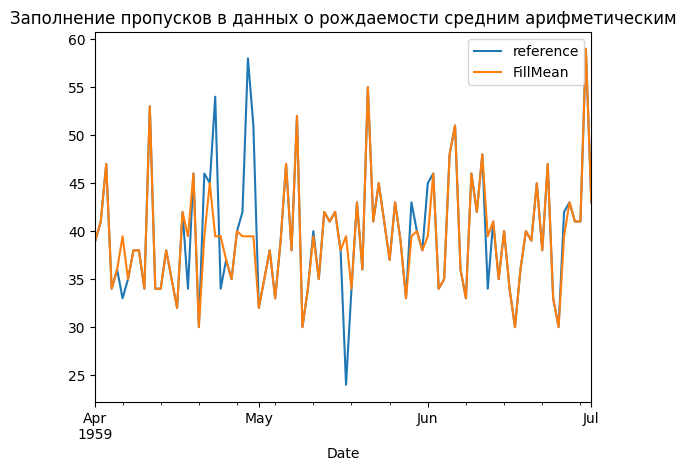

In [49]:
# сделаем то же самое для данных о рождаемости
births[['reference', 'FillMean']].plot()
plt.title('Заполнение пропусков в данных о рождаемости средним арифметическим')

In [50]:
#Библиотека imputena

In [51]:
# установим библиотеку
!pip install imputena

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag